In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from tqdm.notebook import tqdm




In [2]:
df_allbookings = pd.read_parquet("../data/processed/df_model.parquet")


In [3]:
df_allbookings["is_booking"].value_counts()


is_booking
1    2988177
Name: count, dtype: int64

In [4]:
# Compute the Top-5 most frequent clusters (the baseline itself)
top5_clusters = (
    df_allbookings["hotel_cluster"]
    .value_counts()
    .head(5)
    .index
    .tolist()
)

top5_clusters


[91, 48, 42, 59, 28]

In [8]:
# implement MAP@5
def apk(actual, predicted, k=5):
    """
    Average Precision at k
    actual: true label (single value)
    predicted: list of predicted labels
    """
    if actual in predicted[:k]:
        return 1.0 / (predicted.index(actual) + 1)
    return 0.0

In [9]:
# apply baseline prediction to every booking
baseline_map5 = np.mean([
    apk(actual, top5_clusters, k=5)
    for actual in df_allbookings["hotel_cluster"]
])

baseline_map5

0.0725471248858418

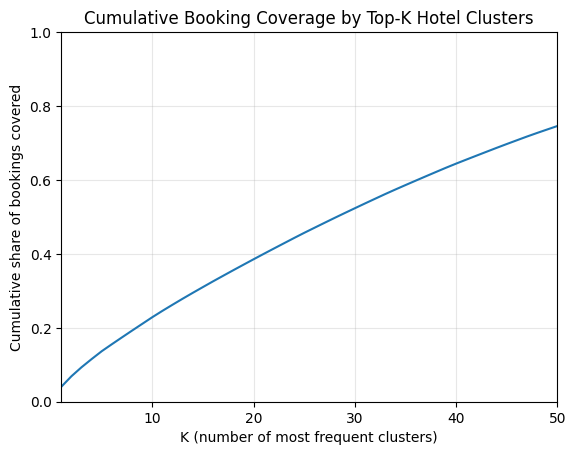

Top-1: 4.0% of bookings covered
Top-3: 9.3% of bookings covered
Top-5: 13.7% of bookings covered
Top-10: 22.9% of bookings covered
Top-20: 38.5% of bookings covered
Top-50: 74.6% of bookings covered


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Booking counts per cluster (descending)
counts = df_allbookings["hotel_cluster"].value_counts()

# Cumulative coverage: share of bookings covered by the top-k most frequent clusters
cum_share = counts.cumsum() / counts.sum()

# Plot: cumulative share vs k
k = np.arange(1, len(cum_share) + 1)

plt.plot(k, cum_share.values)
plt.title("Cumulative Booking Coverage by Top-K Hotel Clusters")
plt.xlabel("K (number of most frequent clusters)")
plt.ylabel("Cumulative share of bookings covered")
plt.xlim(1, 50)  # show top 50 for readability; change if you want
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.show()

# Optional: print a few key points for slide annotations
for kk in [1, 3, 5, 10, 20, 50]:
    if kk <= len(cum_share):
        print(f"Top-{kk}: {cum_share.iloc[kk-1]:.1%} of bookings covered")
